In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt

/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/tf_Wav_reader.py
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/611.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/364.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/367.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/116.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/1490.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/374.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/1359.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/485.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/456.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/626.wav
/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/Nelson_Mandela/590.

# **Loading Dataset from Local Directory**
This cell loads the dataset by listing the contents of the provided dataset directory. It prints the names of all subfolders (presumably speaker or category folders).

In [2]:
DATASET_PATH = "/kaggle/input/speaker-recognition-dataset/16000_pcm_speeches/"
dir_list = os.listdir(DATASET_PATH)
print(dir_list)


['Nelson_Mandela', 'Benjamin_Netanyau', 'other', '_background_noise_', 'tf_Wav_reader.py', 'Magaret_Tarcher', 'Jens_Stoltenberg', 'Julia_Gillard']


# **Exploring Directory Structure**
This block iterates through the main dataset directory and prints subfolder names, helping us understand the dataset's file organization.

In [3]:
for folder in os.listdir(DATASET_PATH):
    print(folder)


Nelson_Mandela
Benjamin_Netanyau
other
_background_noise_
tf_Wav_reader.py
Magaret_Tarcher
Jens_Stoltenberg
Julia_Gillard


# **Listing Audio Files**
This cell lists the audio files inside one of the speaker folders to examine the file naming convention and content structure.

In [4]:
print(os.listdir(DATASET_PATH + "Nelson_Mandela"))


['611.wav', '364.wav', '367.wav', '116.wav', '1490.wav', '374.wav', '1359.wav', '485.wav', '456.wav', '626.wav', '590.wav', '296.wav', '1180.wav', '1312.wav', '66.wav', '468.wav', '526.wav', '339.wav', '956.wav', '300.wav', '493.wav', '688.wav', '947.wav', '510.wav', '229.wav', '721.wav', '497.wav', '162.wav', '1319.wav', '600.wav', '1122.wav', '671.wav', '1234.wav', '818.wav', '1251.wav', '17.wav', '88.wav', '1465.wav', '482.wav', '138.wav', '244.wav', '1159.wav', '1388.wav', '136.wav', '786.wav', '644.wav', '1279.wav', '599.wav', '862.wav', '274.wav', '163.wav', '1058.wav', '164.wav', '255.wav', '85.wav', '1208.wav', '1331.wav', '1074.wav', '736.wav', '835.wav', '783.wav', '1111.wav', '1006.wav', '158.wav', '279.wav', '953.wav', '291.wav', '1036.wav', '0.wav', '174.wav', '917.wav', '813.wav', '1306.wav', '226.wav', '715.wav', '570.wav', '999.wav', '98.wav', '1425.wav', '380.wav', '288.wav', '414.wav', '909.wav', '1154.wav', '1243.wav', '1380.wav', '932.wav', '1014.wav', '467.wav', '7

# **Reading and Plotting an Audio File**
The following code reads a sample audio file and plots its waveform. This is helpful to visualize how the raw audio signal looks in the time domain.

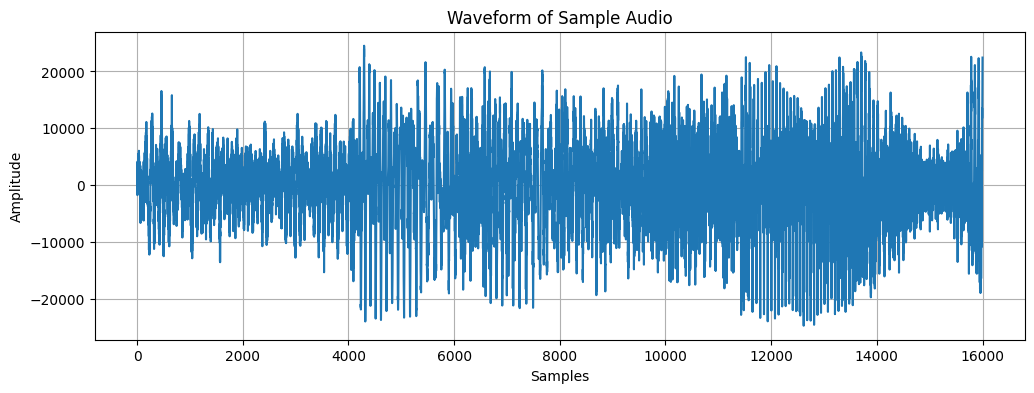

In [5]:
import scipy.io.wavfile as wavfile

file_path = os.path.join(DATASET_PATH, "Nelson_Mandela", "775.wav")
sample_rate, signal = wavfile.read(file_path)

plt.figure(figsize=(12, 4))
plt.plot(signal)
plt.title("Waveform of Sample Audio")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


# **Exploring the Shape and Sample Rate**
This cell prints the shape of the audio signal array and the sampling rate. It helps verify the audio length and sampling details, which are important for consistent processing.

In [6]:
print("Signal shape:", signal.shape)
print("Sample rate:", sample_rate)


Signal shape: (16000,)
Sample rate: 16000


# **Normalizing the Audio Signal**
The following step normalizes the audio signal to bring the amplitude values between -1 and 1. Normalization helps in stabilizing the training process when working with audio features.

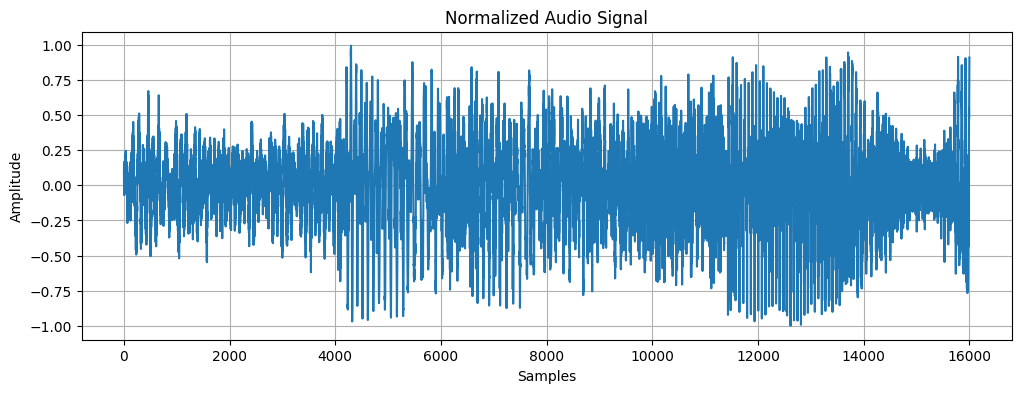

In [7]:
normalized_signal = signal / np.max(np.abs(signal))
plt.figure(figsize=(12, 4))
plt.plot(normalized_signal)
plt.title("Normalized Audio Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


# **Generating the Spectrogram**
This code generates a spectrogram from the audio signal. Spectrograms represent audio in the time-frequency domain, which is useful for feature extraction in tasks like speaker or speech recognition.

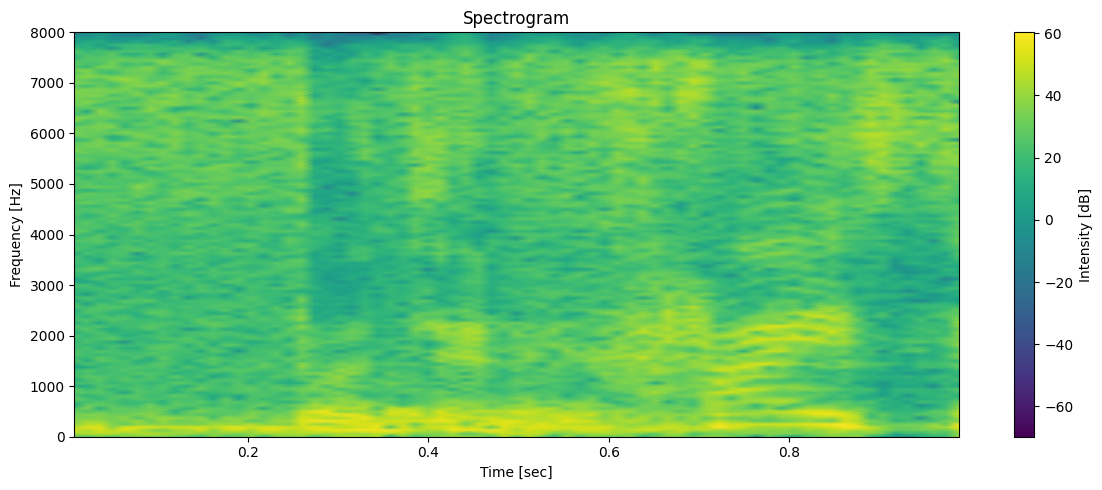

In [8]:
from scipy.signal import spectrogram

frequencies, times, spec = spectrogram(signal, fs=sample_rate)
plt.figure(figsize=(12, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(spec), shading='gouraud')
plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()


# **MFCC Feature Extraction**
This cell extracts Mel-frequency cepstral coefficients (MFCCs), a commonly used feature in audio classification tasks. MFCCs capture the timbral texture of audio and are robust for speech analysis.

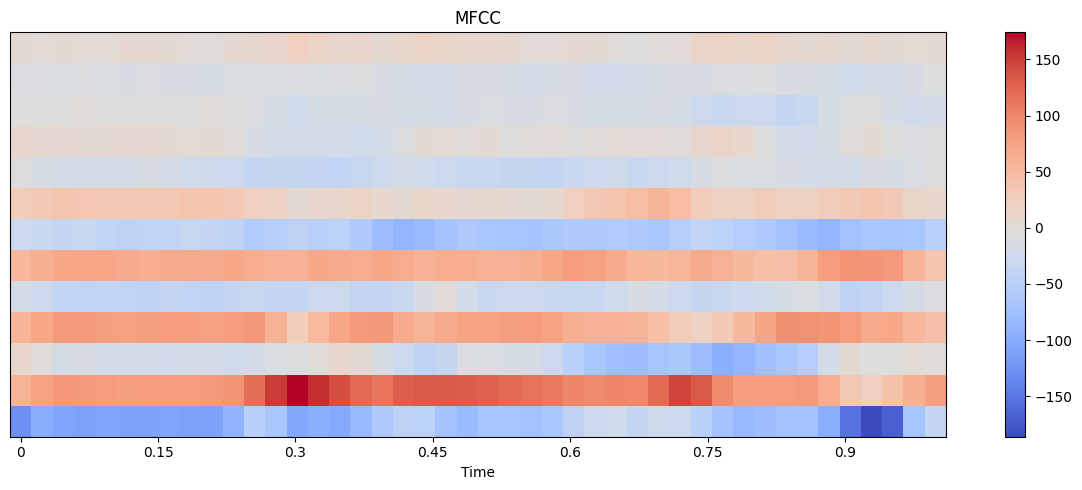

In [9]:
import librosa
import librosa.display

y, sr = librosa.load(file_path)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.tight_layout()
plt.show()


# **Calculating Delta Features**
Delta features represent the rate of change of MFCCs over time. This captures dynamic aspects of speech and often improves model performance when combined with static MFCCs.

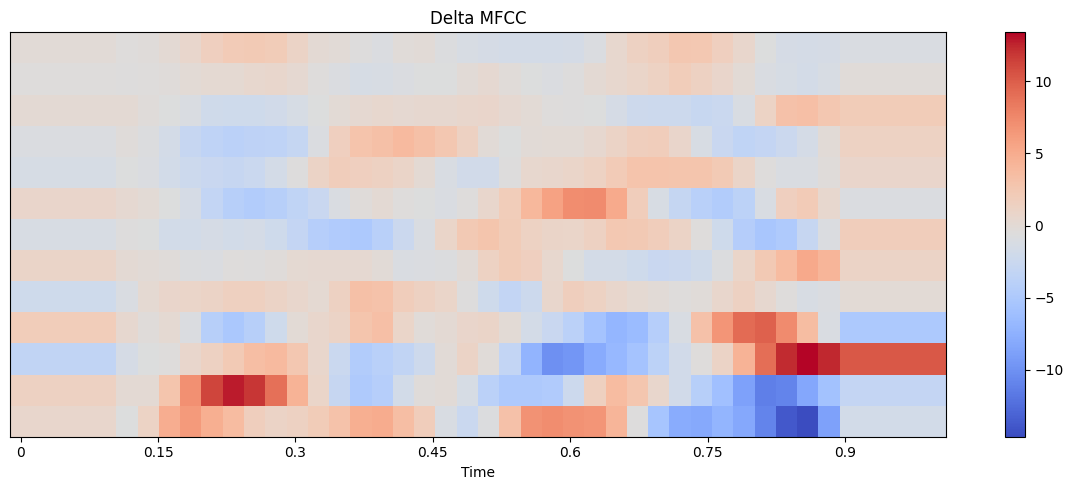

In [10]:
delta_mfccs = librosa.feature.delta(mfccs)

plt.figure(figsize=(12, 5))
librosa.display.specshow(delta_mfccs, x_axis='time')
plt.colorbar()
plt.title("Delta MFCC")
plt.tight_layout()
plt.show()


# **Calculating Delta-Delta (Acceleration) Features**
This step computes the second-order derivative (delta-delta) of the MFCCs, often called "acceleration" features. These provide additional temporal context useful in distinguishing speaker characteristics.

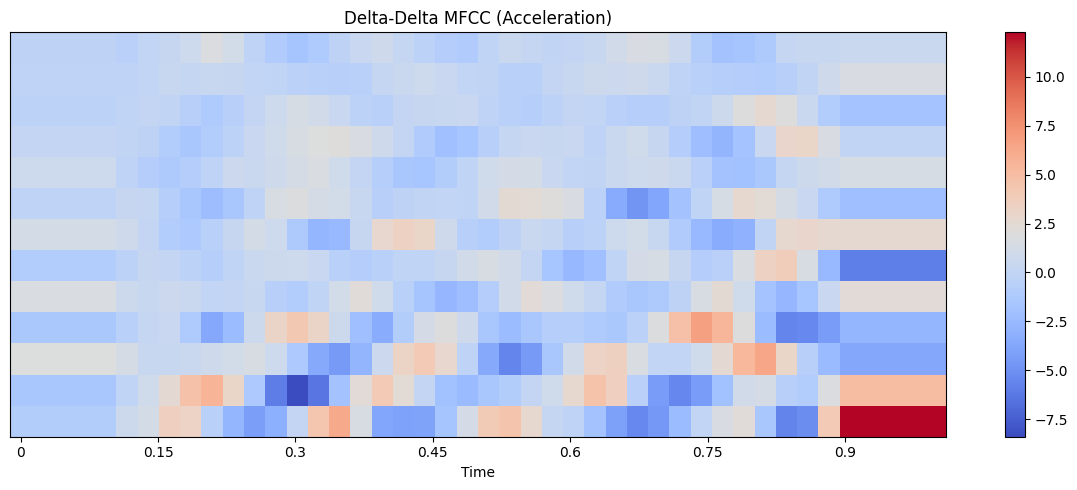

In [11]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

plt.figure(figsize=(12, 5))
librosa.display.specshow(delta2_mfccs, x_axis='time')
plt.colorbar()
plt.title("Delta-Delta MFCC (Acceleration)")
plt.tight_layout()
plt.show()


# **Concatenating MFCC, Delta, and Delta-Delta Features**
This code concatenates all three sets of features—MFCC, Delta, and Delta-Delta—into a single feature matrix for use in model training or speaker recognition. The shape of the resulting matrix gives an idea of the feature dimensionality.

In [12]:
combined_features = np.vstack([mfccs, delta_mfccs, delta2_mfccs])
print("Combined feature shape:", combined_features.shape)


Combined feature shape: (39, 44)


# **Averaging Features Across Time**
Here, we compute the mean of the combined features across all time steps. This step is commonly used for fixed-length feature extraction, especially when working with machine learning models that do not support variable-length sequences.

In [13]:
mean_features = np.mean(combined_features, axis=1)
print("Mean feature vector shape:", mean_features.shape)
print("Mean feature vector:", mean_features)


Mean feature vector shape: (39,)
Mean feature vector: [-8.2081413e+01  9.9779076e+01 -2.9482990e+01  6.7882309e+01
 -2.9140160e+01  6.5473053e+01 -5.7089169e+01  2.4236341e+01
 -2.3075003e+01 -3.0970571e+00 -1.4154987e+01 -1.3568188e+01
  6.4274440e+00 -3.4987363e-01 -7.5221479e-01  6.1743510e-01
 -3.5003221e-01  7.9978406e-02  3.0284983e-01 -7.6401728e-01
 -1.8193941e-01  4.9335957e-03 -2.8211322e-01 -8.1596062e-02
 -2.0602521e-01 -7.6082759e-02  9.6858269e-01  2.1116191e-01
  1.2105074e-01 -5.8887744e-01  4.0394965e-01 -6.5369147e-01
  4.7618705e-01 -2.3942150e-01  2.5486568e-01  7.0885859e-02
 -1.5970324e-01  1.4085257e-01  8.2514231e-04]


# **Extracting Features for All Files**
This function extracts the combined MFCC, delta, and delta-delta mean features from every .wav file in the dataset. It stores them alongside corresponding speaker labels.

In [14]:
def extract_mfcc_sequences(dataset_path, max_len=100):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith(".wav"):
                    file_path = os.path.join(folder_path, filename)
                    y_audio, sr = librosa.load(file_path)
                    mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=13)
                    delta = librosa.feature.delta(mfcc)
                    delta2 = librosa.feature.delta(mfcc, order=2)

                    features = np.vstack([mfcc, delta, delta2]).T  # (time_steps, 39)

                    if features.shape[0] > max_len:
                        features = features[:max_len, :]
                    else:
                        pad_width = max_len - features.shape[0]
                        features = np.pad(features, ((0, pad_width), (0, 0)), mode='constant')

                    X.append(features)
                    y.append(folder)
    return np.array(X), np.array(y)


# **Running the Feature Extraction Pipeline**
This cell executes the function defined above to get features and labels for the entire dataset. These will be used for training and evaluating a machine learning model.

In [15]:
X, y = extract_features_and_labels(DATASET_PATH)
print("Feature shape:", X.shape)
print("Labels shape:", y.shape)


NameError: name 'extract_features_and_labels' is not defined

# Encode Labels and Split Dataset

We encode speaker labels into integers using `LabelEncoder`, and split the sequence dataset into training and test sets.


In [ ]:
X_seq, y_seq = extract_mfcc_sequences(DATASET_PATH)

# Encode labels
y_seq_encoded = LabelEncoder().fit_transform(y_seq)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq_encoded, test_size=0.2, random_state=42)

print("Input shape:", X_train.shape)  # Should be (samples, 100, 39)
print("Output classes:", np.unique(y_seq_encoded))


# Train CNN + LSTM Neural Network

We now train a hybrid model combining convolutional layers (to extract local patterns from MFCC time-series) and LSTM layers (to capture temporal dependencies), followed by dense layers for classification. Dropout and batch normalization are added to improve generalization.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(len(np.unique(y_seq_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=16)


# Visualize Model Accuracy and Loss

We visualize training and validation accuracy/loss curves to monitor the performance and overfitting behavior of the model.


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **Evaluating the Model on Test Set**
After training, we test the model on the held-out data and calculate its accuracy.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



# **Predicting a Speaker for a New Sample**
This cell demonstrates how to use the trained model to predict the speaker for a new audio sample.

In [ ]:
test_file = os.path.join(DATASET_PATH, "Nelson_Mandela", "1094.wav")
y_new, sr_new = librosa.load(test_file)
mfcc_new = librosa.feature.mfcc(y=y_new, sr=sr_new, n_mfcc=13)
delta_new = librosa.feature.delta(mfcc_new)
delta2_new = librosa.feature.delta(mfcc_new, order=2)
combined_new = np.vstack([mfcc_new, delta_new, delta2_new])
mean_feat_new = np.mean(combined_new, axis=1).reshape(1, -1)

predicted_label = clf.predict(mean_feat_new)
predicted_speaker = le.inverse_transform(predicted_label)
print("Actual speaker: Nelson Mandela")
print("Predicted speaker:", predicted_speaker[0])
